# Descriptive Statistics

- Mean
- Median
- Mode
- Standard Deviation
- Variance
- Correlation
- Normal Distribution
- Feature of Normal Distribution
- Positively Skewed & Negatively Skewed Normal Distribution
- Effect on Mean, Median and Mode due to Skewness
- QQ Plot and its implementation 
- Box Cox and its the implementation 

In [5]:
import numpy as np 
import scipy 
from scipy import stats

In [43]:
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv("data_1.csv")

In [4]:
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


# Mean
- Mean is the average of given data set 
- It is calculated by adding all the data points and diving by total number of data points with in the set .

### Formula:
$$ Mean = \frac{\Sigma(x_i)}{N} $$

#### Example:
Given data set is (40, 30 , 10, 20, 50) 

 $$ Mean = \frac{40+30+10+20+50}{5} = 30 $$
               

In [1]:
def mean1(x):
    a = len(x)
    mean = sum(x) / a
    return mean

In [9]:
mean1(df["Mthly_HH_Income"])

41558.0

In [8]:
df["Mthly_HH_Income"].mean()

41558.0

# Median 
- If the observations are arranged in increasing or decreasing order, the **MEDIAN** is defined as the middle observation 

### Formula:
1. **Median of ungrouped data:** if 'n' items in the data are arranged in ascending or descending order and if 'n' is odd, then  $$ \frac{n+1}{2} $$item is called **median**
- If 'n' is even, then the average of $$ \frac{n}{2}th $$ and $$ (\frac{n}{2}+1)th $$ item is called median

2. **Median of grouped data:** 
   $$ Median = l+\frac{(\frac{n}{2}-m)xc}{f}$$
   here l = lower boundary of the median class
        n = total number of observations or total frequency 
        m = cummulative frequencies of the class preceding the median class
        c = class interval
        f = frequency of the median class
        
#### Example:
Given data set is (40, 30 , 10, 20, 50)
- To find the median of the numbers first sort them in increasing order i.e., (10, 20, 30, 40, 50)
- number of digites is odd = 5
- Therefore $$ Median = \frac{n+1}{2} = 3rd value = 30 $$



In [53]:
def median1(x):
    n = len(x)
    x.sort_values()
  
    if n % 2 == 0:
        median1 = x[n//2]
        median2 = x[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = x[n//2] 
    return median

In [54]:
median1(df["Mthly_HH_Income"])

35000.0

In [20]:
df["Mthly_HH_Income"].median()

35000.0

# Mode:
- The item having maximum frequency is called mode.

### Formula: 
1. **Mode of ungrouped data:** The item which repeats more is called **mode**.
2. **Mode of grouped data:** The class containing maximum frequency is called modal class.
$$ Mode = l+\frac{f-f_1}{2f-(f_1+f_2)}xc $$
- Here l = lower boundary of the modal class
       F = frequency in the class immediately lower than the modal class
       C = class interval
       
#### Example:
- Given data set (10, 20, 30, 10, 20, 10, 30)
$$ Mode = 10 $$
       


In [70]:
from collections import Counter
def mode1(x):
    c = Counter(x)
    return [k for k,v in c.items() if v == c.most_common(1)[0][1]]
    
        

In [71]:
mode1(df["Mthly_HH_Income"])

[45000]

In [50]:
df["Mthly_HH_Income"].mode()

0    45000
dtype: int64

## Relation between mean, median and mode 
$$ Median-Mode = 3(Mean-Median) $$
$$ Mode = 3Median - 2Mean $$

# Standard deviation:
- Standard deviation is the measurement of average distance between each quantity and mean i.e.,how data is spread out from mean. 
- A low standard deviation indicates that the data points tend to be close to the mean of the data set.
- a high standard deviation indicates that the data points are spread out over a wider range of values.
- There are situations when we have to choose between sample or population Standard Deviation.

### Formula:
1. When we are asked to find SD of some part of a population, then we use sample Standard Deviation.

$$ \sigma = \sqrt{\frac{1}{n-1} \sum_{i=0}^{n} (x-\bar{x})^2}$$
   where x̅ is mean of a sample.
2.  when we have to deal with a whole population, then we use population Standard Deviation.

$$ \sigma = \sqrt{\frac{1}{n} \sum_{i=0}^{n} (x-\mu)^2} $$
    where µ is mean of a population.
   
#### Example:
- Given data set (12, 24, 41, 51, 67, 67, 85, 99) 
  substitute the values in sample formula
  we get,
  
$$ \sigma = \frac{\sqrt{(((12-55.75)^2)+((24-55.75)^2)+((41-55.75)^2)+((51-55.75)^2)+((67-55.75)^2)+((67-55.75)^2)+((85-55.75)^2)+((99-55.75)^2)}}{\sqrt{7}} $$

$$ = 29.62 $$

In [95]:
import math
def std1(x):
    mean2 = sum(x)/len(x)
    var = sum(pow(x-mean2,2))
    std = math.sqrt(var/len(x)-1)
    return std

In [96]:
std1(df["Mthly_HH_Income"])

25835.611759739695

In [90]:
df["Mthly_HH_Income"].std()

26097.908978713687

# Variance: 
- Variance is a square of average distance between each quantity and mean. That is it is square of standard deviation.

### Formula:
$$ variance = (standard deviation)^2 = \sigma^2 $$

#### Example:
- consider the example above in standard deviation, 
  we get variance as
  $$ \sigma^2 = (29.62)^2 = 877.34 $$
  $$ variance = 877.34 $$

In [101]:
import math
def var1(x):
    mean2 = sum(x)/len(x)
    v = sum(pow(x-mean2,2))
    var = v/len(x)-1
    return var

In [102]:
var1(df["Mthly_HH_Income"])

667478835.0

In [52]:
df["Mthly_HH_Income"].var()

681100853.0612245

# Correlation:
- Correlation is a statistical technique that can show how strongly pairs of variables are related.
- It’s a common tool for describing simple relationships without making a statement about cause and effect.

### Measured:
- The sample **correlation coefficient**: r, which quantifies the strength of the relationship. Correlations are also tested for statistical significance.
-  It ranges from -1.0 to +1.0. 
- The closer r is to +1 or -1, the more closely the two variables are related.
- If r is close to 0, it means there is no relationship between the variables. 
- If r is positive, it means that as one variable gets larger the other gets larger.
- If r is negative it means that as one gets larger, the other gets smaller (often called an “inverse” correlation).

#### Example: 
![Image 20](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [140]:
df[['Annual_HH_Income','Mthly_HH_Income']].corr()

,Annual_HH_Income,Mthly_HH_Income
Annual_HH_Income,1.000000,0.970315
Mthly_HH_Income,0.970315,1.000000


In [135]:
import seaborn as sn
import matplotlib.pyplot as plt

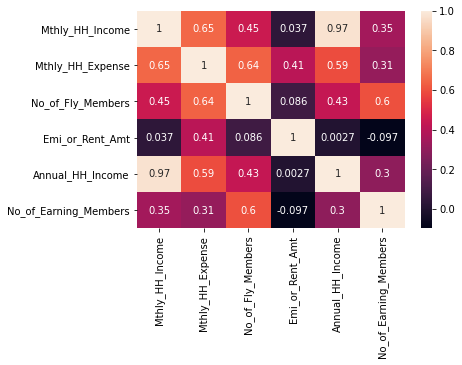

In [136]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Normal Distribution:
- Normal distribution, also known as the **Gaussian distribution**, is a **probability distribution** that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 
- In graph form, normal distribution will appear as a **bell curve**
![Image 1](http://sciences.usca.edu/biology/zelmer/305/norm/stanorm.jpg)
- In a normal distribution the mean is zero and the standard deviation is 1.
- Normal distributions are symmetrical, but not all symmetrical distributions are normal.
#### For example:
- heights, blood pressure, measurement error, and IQ scores follow the normal distribution.

# Feature of Normal Distribution:
- The mean, mode and median are all equal.
- The curve is symmetric at the center (i.e. around the mean, μ).
- Exactly half of the values are to the left of center and exactly half the values are to the right.
- The total area under the curve is 1.
- **The Data Is Centered About the Mean-Mode-Median** 
- The mean-mode-median is in the center.
#### **The frequency curve is bell shaped.**
   - The bell shape has perfect bilateral symmetry - the left balances exactly with the right.
   - The score at -2 is balanced by a score at +2 and the frequencies from 0 to +2 and from 0 to -2 are equal.
   - The area under the curve from 0 to +2 is exactly the same as the area under the curve from 0 to -2.
   - Fifty percent of the scores are above the mean and 50% are below the mean.
 
- The probability a score is above the mean is 50% and the probability a score is below the mean is 50%.
- Most of the scores are in the middle, about the mean, and few are in the tails, at the extremes.


#### **The 68-95-99 rule:**
  The 68-95-99 rule is based on the mean and standard deviation. It says:
  - 68% of the population is within 1 standard deviation of the mean.
  - 95% of the population is within 2 standard deviation of the mean.
  - 99.7% of the population is within 3 standard deviation of the mean.
  
 ![68-95-99](https://www.freecodecamp.org/news/content/images/2020/08/normal_dist_68_rule.jpg)
 
- The frequencies for the set of scores with a normal distribution are stated by a function which includes as controlling features both the mean, µ, and the standard deviation, , of the set of scores.
   That function is:
 
 $$ f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-1}{2}(\frac{x-\mu}{\sigma})^2 $$

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [37]:
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv("data_1.csv")

In [115]:
x = df
def normal_dist1(x , mean , sd):
        prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
        return prob_density
        mean = np.mean(x)
        sd = np.std(x)
        pdf = normal_dist(x,mean,sd)
        plt.plot(x,pdf , color = 'red')
        plt.xlabel('Data points')
        plt.ylabel('Probability Density')
        plt.show()

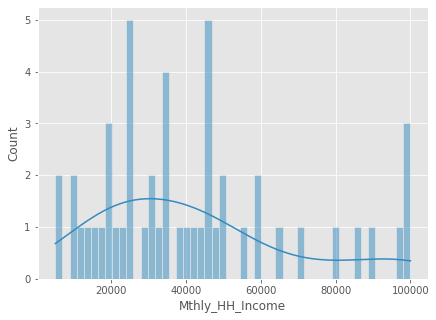

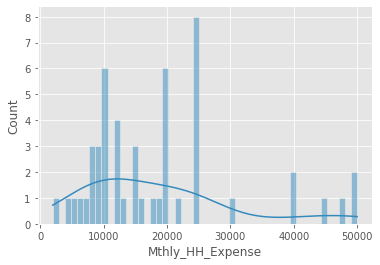

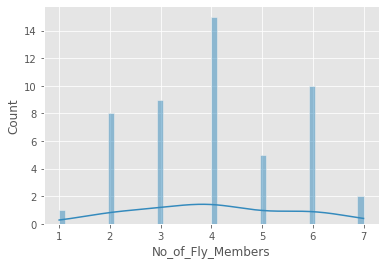

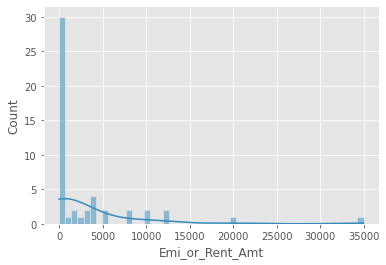

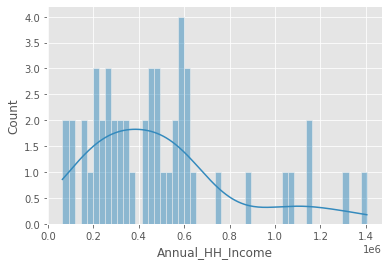

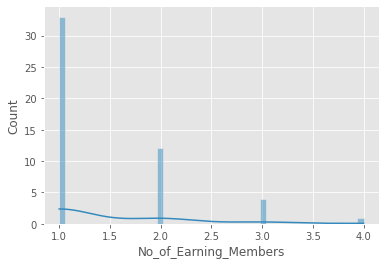

In [114]:
plt.subplots(figsize=(7,5))
sn.histplot(df['Mthly_HH_Income'], bins = 50, kde=True)
plt.show()
sn.histplot(df['Mthly_HH_Expense'], bins = 50, kde=True)
plt.show()
sn.histplot(df['No_of_Fly_Members'], bins = 50, kde=True)
plt.show()
sn.histplot(df['Emi_or_Rent_Amt'], bins = 50, kde=True)
plt.show()
sn.histplot(df['Annual_HH_Income'], bins = 50, kde=True)
plt.show()
sn.histplot(df['No_of_Earning_Members'], bins = 50, kde=True)
plt.show()


# Positively Skewed & Negatively Skewed Normal Distribution:

#### Negatively Skewed Normal Distribution:
- A **left-skewed distribution** has a long left tail. 
  - Left-skewed distributions are also called **negatively-skewed distributions.** That’s because there is a long tail in the negative direction on the number line. 
   - The mean is also to the left of the peak.
   
![lskewness](https://www.statisticshowto.com/wp-content/uploads/2015/07/skewed-left.png)

#### Positively Skewed Normal Distribution :
- A **right-skewed distribution** has a long right tail.
  - Right-skewed distributions are also called **positive-skew distributions.** That’s because there is a long tail in the positive direction on the number line. 
  - The mean is also to the right of the peak.

![skewness](https://i1.wp.com/psychologyhub.co.uk/wp-content/uploads/2018/01/right-skewed-graph.jpg?w=355&h=326&ssl=1)

# Effect on Mean, Median and Mode due to Skewness:

##### Consider the following data set.
$$ 4,5,6,6,6,7,7,7,7,7,7,8,8,8,9,10 $$

- This data set can be represented by following histogram. Each interval has width one, and each value is located in the middle of an interval.

![sh](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/132/2016/04/21214237/fig-ch02_08_01.jpg)

- The histogram displays a symmetrical distribution of data.
  - A distribution is symmetrical if a vertical line can be drawn at some point in the histogram such that the shape to the left and the right of the vertical line are mirror images of each other. 
  - The mean, the median, and the mode are each seven for these data. In a perfectly symmetrical distribution, the mean and the median are the same. 
  - This example has one mode (unimodal), and the mode is the same as the mean and median. In a symmetrical distribution that has two modes (bimodal), the two modes would be different from the mean and median.

##### Now consider data set: 
$$ 4,5,6,6,6,7,7,7,7,8, $$

- The above data is not symmetrical '
  -  A distribution of this type is called skewed to the left because it is pulled out to the left.
![sh](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/132/2016/04/21214239/fig-ch02_08_02.jpg)

- **The mean is 6.3, the median is 6.5, and the mode is 7.
  - **Notice that the mean is less than the median, and they are both less than the mode.**
  
##### Let us now consider the data set 6, 7, 7, 7, 7, 8, 8, 9, 10
- The above data is also not symmetrical.
  - It is **skewed to the right.**
![sh](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/132/2016/04/21214242/fig-ch02_08_03.jpg)

- **The mean is 7.7, the median is 7.5, and the mode is 7.
  - Of the three statistics, **the mean is the largest, while the mode is the smallest**. 
 
- To summarize, generally 
  - if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode.
  - If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.
  
  ![skewness](https://i.pinimg.com/736x/16/8d/61/168d619ae584c616adab5670ca38606b.jpg)

In [44]:
import seaborn as sn

In [45]:
df.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

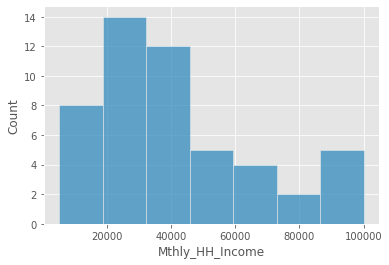

In [46]:
sn.histplot(x="Mthly_HH_Income", data=df)
plt.show()

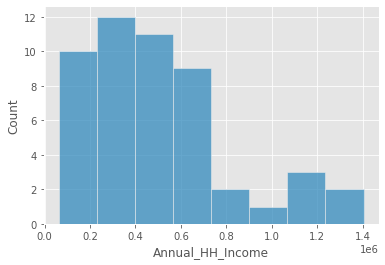

In [47]:
sn.histplot(x="Annual_HH_Income", data=df)
plt.show()

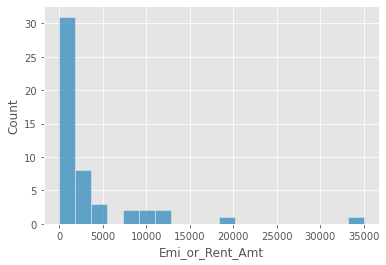

In [48]:
sn.histplot(x="Emi_or_Rent_Amt", data=df)
plt.show()

# QQ Plot and its implementation:

- QQ stants for quantile-quantile making QQ plot as quantile-quantile plot
- QQ plot is a graphical tool thats helps us to assess if a data set came from some theoritical distribution such as Normal or exponential. 

#### Example:
- if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption.

- A QQ plot is a visual check and helps us to  see at-a-glance if our assumption is plausible or not and how the assumption is violated and what data points contribute to the violation.

- A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. 

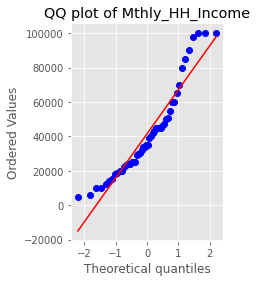

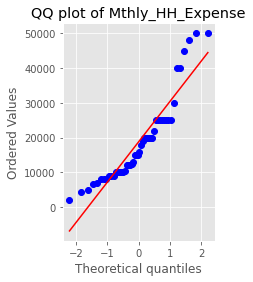

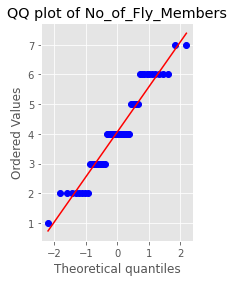

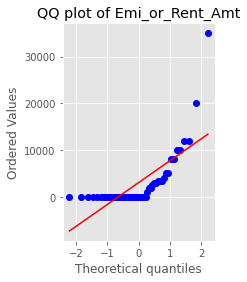

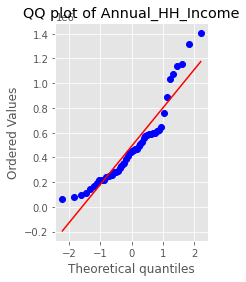

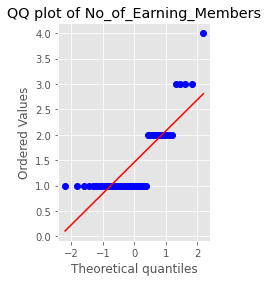

In [61]:
import pylab 
import scipy.stats as stats


for col in ['Mthly_HH_Income', 'Mthly_HH_Expense', 
            'No_of_Fly_Members', 'Emi_or_Rent_Amt', 
            'Annual_HH_Income', 'No_of_Earning_Members']:
    plt.subplot(1, 2, 1)
    stats.probplot(df[col], dist="norm", plot=pylab)
    plt.title('QQ plot of '+ col)

    plt.show()

# Box Cox and its the implementation:

- A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. 
- Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

### Running the Test:
- At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. 
- All values of λ are considered and the optimal value for your data is selected.
- The “optimal value” is the one which results in the best approximation of a normal distribution curve. 
- The transformation of Y has the form:

$$ y(\lambda) =  \left\{
    \begin{array}\\
        \frac{y^\lambda-1}{\lambda}, & \mbox{if } \lambda \neq 0; \\
      \log(y), & \mbox{if } \lambda = 0. 
    \end{array}
\right.$$

- This test only works for positive data. However, Box and Cox did propose a second formula that can be used for negative y-values:

$$ y(\lambda) =  \left\{
    \begin{array}\\
        \frac{(y+\lambda_2)^\lambda-1}{\lambda}, & \mbox{if } \lambda \neq 0; \\
      \log(y+\lambda_2), & \mbox{if } \lambda = 0. 
    \end{array}
\right.$$

- The formulae are deceptively simple. Testing all possible values by hand is unnecessarily labor intensive; most software packages will include an option for a Box Cox transformation

In [64]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn

In [75]:
import warnings
warnings.filterwarnings('ignore')

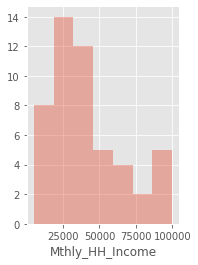

In [76]:
for col in ['Mthly_HH_Income']:
    plt.subplot(1, 2, 1)
sn.distplot(df[col], kde=False)
plt.show()

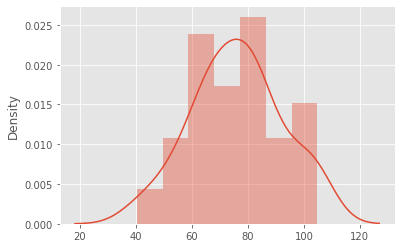

In [73]:
to_guass, _ = stats.boxcox(df[col])
sn.distplot(to_guass, kde=True)
plt.show()

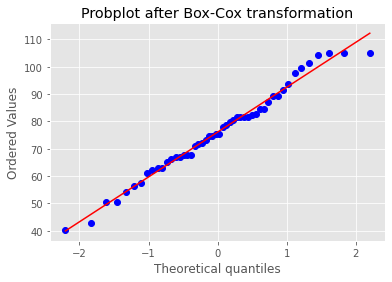

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

prob = stats.probplot(to_guass, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot after Box-Cox transformation')

plt.show()